In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

# 텐서 씨드 고정
import tensorflow as tf
import random
import os
#글로벌 시드
class config:
    seed = 1234
    device = "cuda:0"    

def seed_everything(seed: int = 1234):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    
seed_everything(config.seed)

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

seed =1234

pd.set_option('display.max_rows', 10, 'display.max_columns', 500, 'max_colwidth', None)

In [2]:
# df = pd.read_csv('./kospi.csv')
df = pd.read_csv('./baseline_hv.csv')

df.shape

(4598, 55)

In [3]:
df.head()

,date,baseline,HV,HV_pred,HV_resid,sum_word,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
0,2003-07-28,100.0,NaN,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-07-29,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-07-30,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-07-31,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-08-01,100.0,0.0,0.0,0.0,3.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.291079e+07,0.0,0.0,0.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.isna().sum()

date           0
baseline       0
HV             1
HV_pred       20
HV_resid      21
              ..
ADOSC          0
Volume_OSC     0
upperband      0
middleband     0
lowerband      0
Length: 55, dtype: int64

In [5]:
df.head()

,date,baseline,HV,HV_pred,HV_resid,sum_word,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
0,2003-07-28,100.0,NaN,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-07-29,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-07-30,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-07-31,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-08-01,100.0,0.0,0.0,0.0,3.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.291079e+07,0.0,0.0,0.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df['sum_word'].fillna(0, inplace=True)
df['sum_word'].isnull().sum()

0

In [7]:
df.set_index('date', inplace=True)

In [8]:
df.head()

,baseline,HV,HV_pred,HV_resid,sum_word,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-07-28,100.0,NaN,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-29,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-30,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-31,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-08-01,100.0,0.0,0.0,0.0,3.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.291079e+07,0.0,0.0,0.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(4598, 54)

In [10]:
cols = ['HV', 'sum_word','MA5_gra','Volume_OSC','Sigma','Disparity20', 'Psy']#, 'MACD_OSC', 'Sonar', 'Sigma', 'Momentum', 'Volume_OSC',  'ATR','RSI signal','RSI14',  'ADOSC']
cols


['HV', 'sum_word', 'MA5_gra', 'Volume_OSC', 'Sigma', 'Disparity20', 'Psy']

In [11]:
df = df[cols]

In [12]:
df.index

Index(['2003-07-28', '2003-07-29', '2003-07-30', '2003-07-31', '2003-08-01',
       '2003-08-04', '2003-08-05', '2003-08-06', '2003-08-07', '2003-08-08',
       ...
       '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
       '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28'],
      dtype='object', name='date', length=4598)

In [13]:
df.head()

,HV,sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20,Psy
date,,,,,,,
2003-07-28,NaN,0.0,0.0,0.0,0.0,0.0,0.000
2003-07-29,0.0,0.0,0.0,0.0,0.0,0.0,2.750
2003-07-30,0.0,0.0,0.0,0.0,0.0,0.0,3.125
2003-07-31,0.0,0.0,0.0,0.0,0.0,0.0,10.625
2003-08-01,0.0,3.0,0.0,0.0,0.0,0.0,13.125


In [14]:
df.shape

(4598, 7)

In [15]:
feature_df = df.loc['2003-09-29':'2021-09-28', 'HV':'Psy']
print(feature_df.shape)
feature_df.head()

(4532, 7)


,HV,sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20,Psy
date,,,,,,,
2003-09-29,0.000000,0.0,-0.003142,0.484744,-1.225259,97.591753,38.250
2003-09-30,0.046147,0.0,-0.007730,4.466314,-1.742624,96.506024,28.250
2003-10-01,0.111621,0.0,0.002179,8.823151,-0.226977,99.353199,37.875
2003-10-02,0.113955,0.0,0.005389,8.880720,0.099223,100.166147,40.125
2003-10-03,0.127419,0.0,0.009944,9.854309,0.955635,101.891182,49.500


In [16]:
label_df = df.loc['2003-09-29':'2021-09-28', 'HV']
print(label_df.shape)
label_df.head()

(4532,)


date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

# TRAIN, TEST 분리
- 1차 : 2003 ~ 2011 학습 / 2012 ~ 2016 예측
- 2차 : 2003 ~ 2016 학습 / 2017~ 2021 예측

## 1차 train_test 분리

In [17]:
X_train_1st = feature_df.loc['2003-09-29':'2011-09-28']
print(X_train_1st.shape)
X_train_1st.head()

(2016, 7)


,HV,sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20,Psy
date,,,,,,,
2003-09-29,0.000000,0.0,-0.003142,0.484744,-1.225259,97.591753,38.250
2003-09-30,0.046147,0.0,-0.007730,4.466314,-1.742624,96.506024,28.250
2003-10-01,0.111621,0.0,0.002179,8.823151,-0.226977,99.353199,37.875
2003-10-02,0.113955,0.0,0.005389,8.880720,0.099223,100.166147,40.125
2003-10-03,0.127419,0.0,0.009944,9.854309,0.955635,101.891182,49.500


In [18]:
y_train_1st = label_df.loc['2003-09-29':'2011-09-28']
print(y_train_1st.shape)
y_train_1st.head()

(2016,)


date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

### test

In [19]:
X_test_1st = feature_df.loc['2011-09-29':'2021-10-28']
print(X_test_1st.shape)
X_test_1st.head()

(2516, 7)


,HV,sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20,Psy
date,,,,,,,
2011-09-29,0.311156,24.0,0.007127,7.613165,-0.607309,97.759248,51.625
2011-09-30,0.324805,12.0,-0.001436,6.637214,-1.508087,95.174749,42.500
2011-10-03,0.327470,10.5,-0.010362,7.614666,-2.099935,92.930028,40.500
2011-10-04,0.340938,42.0,-0.010086,13.034524,-1.284014,95.421343,47.500
2011-10-05,0.327492,21.0,-0.002000,12.029998,-0.667012,97.453557,57.125


In [20]:
y_test_1st = label_df.loc['2011-09-29':'2021-10-28']
print(y_test_1st.shape)
y_test_1st.head()

(2516,)


date
2011-09-29    0.311156
2011-09-30    0.324805
2011-10-03    0.327470
2011-10-04    0.340938
2011-10-05    0.327492
Name: HV, dtype: float64

In [21]:
print(X_train_1st.shape, y_train_1st.shape)
print(X_test_1st.shape, y_test_1st.shape)

(2016, 7) (2016,)
(2516, 7) (2516,)


## scaling
X와 y를 각각 scaling 해주어야한다.

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Standardization 평균 0 / 분산 1
X_scaler = MinMaxScaler()

# 교차검증시
X_scaler.fit(X_train_1st)
X_train_1st_sc = X_scaler.transform(X_train_1st)
X_test_1st_sc = X_scaler.transform(X_test_1st)

In [23]:
# from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
y_scaler = MinMaxScaler()   

# 교차검증시
y_scaler.fit(np.array(y_train_1st).reshape(-1,1))
y_train_1st_sc = y_scaler.transform(np.array(y_train_1st).reshape(-1,1))
y_test_1st_sc = y_scaler.transform(np.array(y_test_1st).reshape(-1,1))

In [24]:
X_train_1st_sc.shape, X_test_1st_sc.shape, y_train_1st.shape, y_test_1st.shape

((2016, 7), (2516, 7), (2016,), (2516,))

In [25]:
y_train_1st_sc[:5]

array([[0.        ],
       [0.04309432],
       [0.1042375 ],
       [0.10641735],
       [0.11899137]])

In [26]:
y_test_1st_sc[:5]

array([[0.29057482],
       [0.30332099],
       [0.30580974],
       [0.31838696],
       [0.30583013]])

In [27]:
y_train_1st[:5]

date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

In [28]:
y_test_1st[:5]

date
2011-09-29    0.311156
2011-09-30    0.324805
2011-10-03    0.327470
2011-10-04    0.340938
2011-10-05    0.327492
Name: HV, dtype: float64

In [29]:
# 입력 파라미터 feature, label -> numpy type
def make_sequence_dataset(feature, label, window_size):
    feature_list = [] # 생성될 feature list
    label_list = []  # 생성될 label list
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list) # 3차원으로 만들어줌

In [30]:
window_size = 20
X_train_1st, y_train_1st = make_sequence_dataset(X_train_1st_sc, y_train_1st_sc, window_size)
X_test_1st, y_test_1st = make_sequence_dataset(X_test_1st_sc, y_test_1st_sc, window_size)
print(X_train_1st.shape, y_train_1st.shape, X_test_1st.shape, y_test_1st.shape) # (batch size, time steps, input dims)

(1996, 20, 7) (1996, 1) (2496, 20, 7) (2496, 1)


# TRAIN, TEST 분리

In [31]:
# input_shape
X_train_1st[0].shape

(20, 7)

# Model

In [32]:
# Initialising the RNN
model_118 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu', return_sequences = True, input_shape = X_train_1st[0].shape))
model_118.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu', return_sequences = True))
model_118.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu', return_sequences = True))
model_118.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu'))
model_118.add(Dropout(0.1))

# Adding the output layer
model_118.add(Dense(units = 1))
model_118.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 10)            720       
_________________________________________________________________
dropout (Dropout)            (None, 20, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 10)            840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 10)            840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                8

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

# 출처: https://kibua20.tistory.com/206 [모바일 SW 개발자가 운영하는 블로그]
sgd = optimizers.SGD(learning_rate = 0.0001)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_118.compile(loss = 'mse', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model_118.fit(X_train_1st, y_train_1st, validation_data = (X_test_1st, y_test_1st), epochs=30, 
          batch_size=15, callbacks = [early_stop])

Epoch 1/30
134/134 [==============================] - 5s 21ms/step - loss: 0.0151 - val_loss: 0.1172
Epoch 2/30
134/134 [==============================] - 4s 26ms/step - loss: 0.0047 - val_loss: 0.0087
Epoch 3/30
134/134 [==============================] - 3s 20ms/step - loss: 0.0037 - val_loss: 0.0198
Epoch 4/30
134/134 [==============================] - 3s 19ms/step - loss: 0.0031 - val_loss: 0.0119
Epoch 5/30
134/134 [==============================] - 4s 27ms/step - loss: 0.0031 - val_loss: 0.0098
Epoch 6/30
134/134 [==============================] - 3s 19ms/step - loss: 0.0026 - val_loss: 0.0151
Epoch 7/30
134/134 [==============================] - 3s 20ms/step - loss: 0.0024 - val_loss: 0.0319
Epoch 8/30
134/134 [==============================] - 4s 27ms/step - loss: 0.0027 - val_loss: 0.0069
Epoch 9/30
134/134 [==============================] - 3s 20ms/step - loss: 0.0026 - val_loss: 0.0086
Epoch 10/30
134/134 [==============================] - 3s 23ms/step - loss: 0.0020 - val_lo

In [34]:
val_loss = history.history['val_loss']
print(val_loss[:5])

[0.11721229553222656, 0.008734550327062607, 0.01978972926735878, 0.01189497672021389, 0.009798374958336353]


In [35]:
train_loss = history.history['loss']
print(train_loss[:5])

[0.015081926248967648, 0.004656046628952026, 0.0036671229172497988, 0.0031131338328123093, 0.003097093664109707]


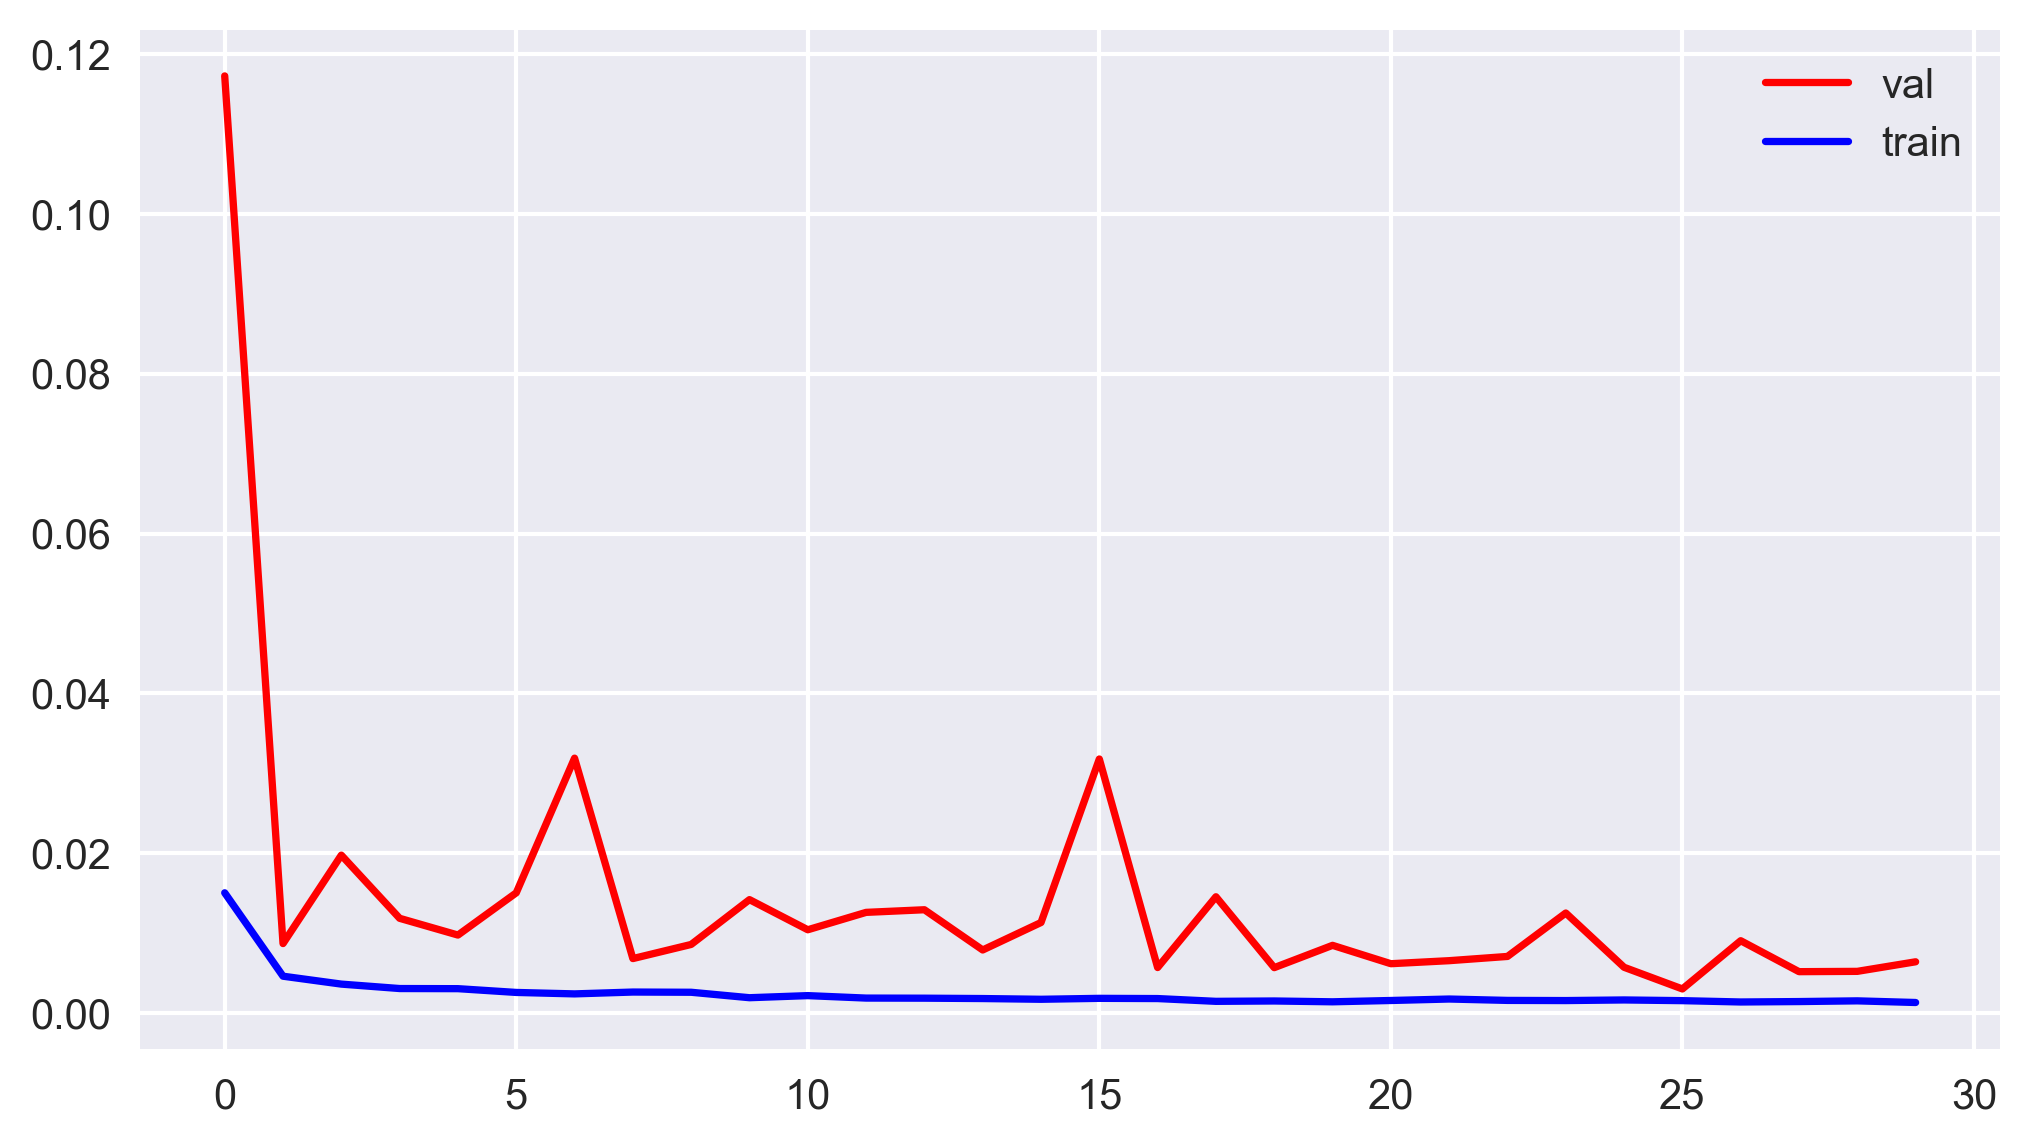

In [36]:
plt.plot(np.arange(len(val_loss)), val_loss, c="red", label='val')
plt.plot(np.arange(len(train_loss)), train_loss, c='blue', label ='train')
plt.legend()
plt.show()

In [37]:
rmse_score = np.sqrt(np.min(val_loss))
rmse_score

0.05533801761079865

# 예측 결과 시각화
- https://www.youtube.com/watch?v=LLLVYkXJw30

In [38]:
pred = model_118.predict(X_test_1st)

In [39]:
pred[:5]

array([[0.27863353],
       [0.26671702],
       [0.2615136 ],
       [0.25724298],
       [0.24577692]], dtype=float32)

In [40]:
np.mean(pred)

0.15198737

In [41]:
y_test_1st[:5]

array([[0.3077117 ],
       [0.28268843],
       [0.28485148],
       [0.29732126],
       [0.2969859 ]])

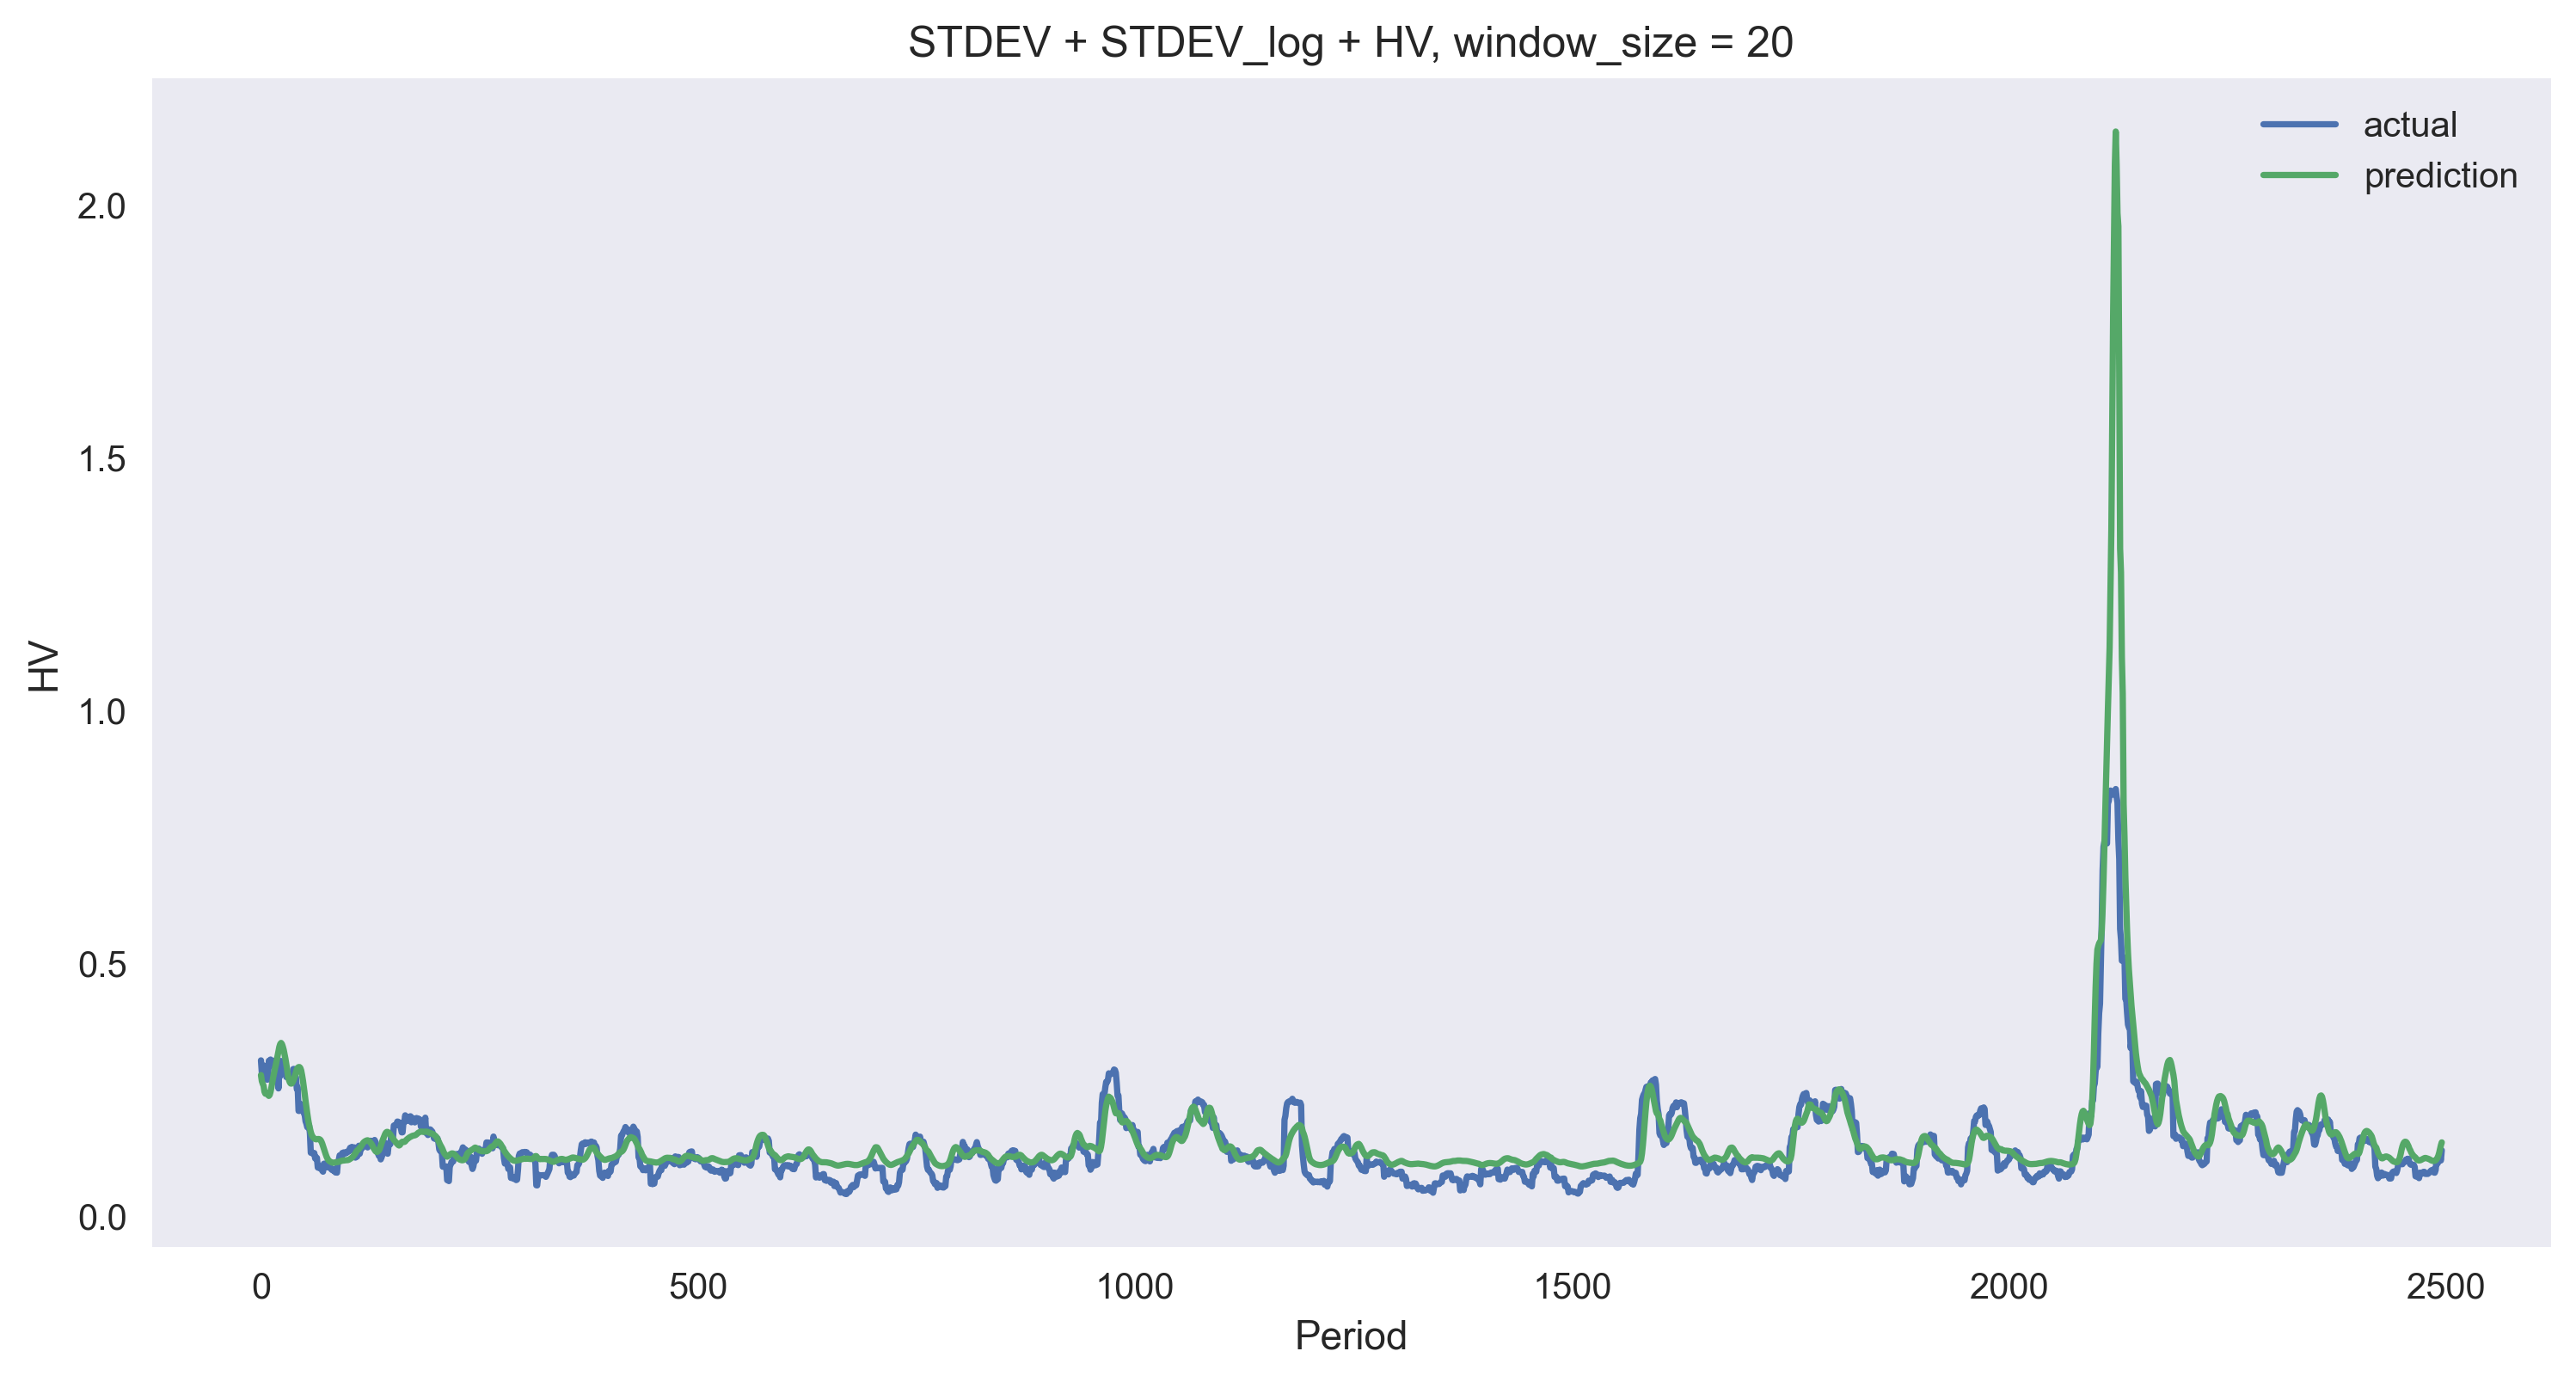

In [42]:
plt.figure(figsize = (12,6))
plt.title('STDEV + STDEV_log + HV, window_size = 20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()